In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.0 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [4]:
data = pd.read_csv("task2.csv")

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [6]:
tokens = []
for text in data["Generation"]:
  tokens.append(tokenizer.tokenize(text))

In [7]:
token_ids = []
for token in tokens:
  token_ids.append(tokenizer.convert_tokens_to_ids(token))

In [8]:
maxlen = 100
padded_sequences = pad_sequences(token_ids, maxlen=maxlen)

In [9]:
labels = pd.get_dummies(data["nlabel"]).values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [11]:
y_test = np.argmax(y_test, axis=1)

In [12]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 51s 170ms/step - loss: 0.2322 - accuracy: 0.9208 - val_loss: 0.1640 - val_accuracy: 0.9350
Epoch 2/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0740 - accuracy: 0.9735 - val_loss: 0.1952 - val_accuracy: 0.9334
Epoch 3/10
235/235 [==============================] - 18s 76ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.2743 - val_accuracy: 0.9318
Epoch 4/10
235/235 [==============================] - 11s 49ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.3288 - val_accuracy: 0.9291
Epoch 5/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.3514 - val_accuracy: 0.9238
Epoch 6/10
235/235 [==============================] - 8s 31ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.3790 - val_accuracy: 0.9318
Epoch 7/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.3948 - val_accuracy: 

In [15]:
y_pred02 = model.predict(X_test)
y_pred02 = np.argmax(y_pred02, axis=1)

74/74 [==============================] - 2s 6ms/step


In [16]:
print(classification_report( y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2133
           1       0.63      0.54      0.58       213

    accuracy                           0.93      2346
   macro avg       0.79      0.75      0.77      2346
weighted avg       0.92      0.93      0.93      2346

[[2065   68]
 [  99  114]]


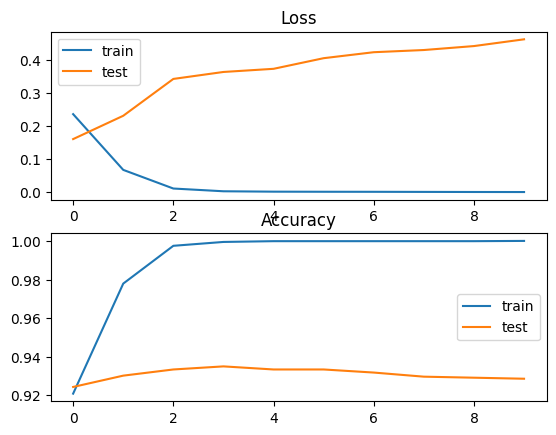

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()